In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

%matplotlib inline

In [34]:
n_sample = 10000
np.random.seed(5)
x_data = np.random.uniform(low=0, high=(2 * math.pi), size = n_sample)
y_data = np.sin(x_data) + (0.1 * np.random.randn(10000))

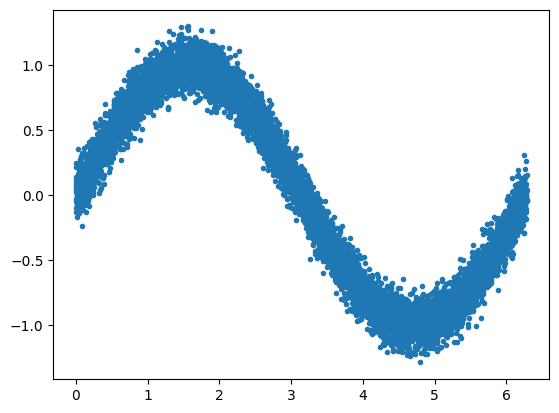

In [35]:
plt.plot(x_data, y_data, '.')

In [36]:
from sklearn.utils import shuffle
x_data, y_data = shuffle(x_data, y_data)

In [37]:
val_split = int(0.2 * n_sample)
test_split = int(val_split + (0.2 * n_sample))
x_val, x_test, x_train = np.split(x_data, [val_split, test_split])
y_val, y_test, y_train = np.split(y_data, [val_split, test_split])

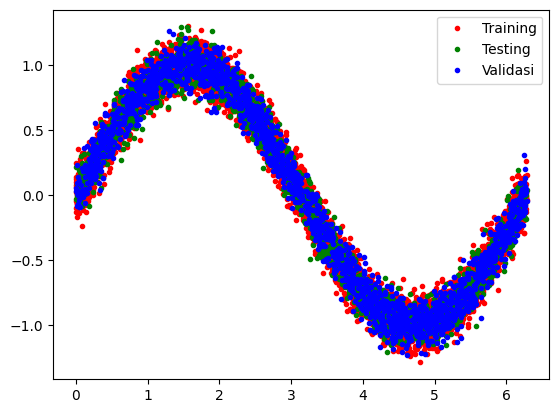

In [38]:
plt.plot(x_train, y_train, '.r', label = "Training")
plt.plot(x_test, y_test, '.g', label = "Testing")
plt.plot(x_val, y_val, '.b', label = "Validasi")
plt.legend()
plt.show()

In [39]:
# Buat Model
import tensorflow as tf
from tensorflow.keras import layers as layers
model = tf.keras.Sequential()
model.add(layer.Dense(16, activation = 'relu', input_shape = (1,)))
model.add(layer.Dense(16, activation = 'relu'))
model.add(layer.Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.compile(optimizer = 'adam', loss = 'mae', metrics=['mae'])

In [41]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs=100)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.8981 - mae: 0.8981 - val_loss: 0.5186 - val_mae: 0.5186
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4871 - mae: 0.4871 - val_loss: 0.4171 - val_mae: 0.4171
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3951 - mae: 0.3951 - val_loss: 0.3403 - val_mae: 0.3403
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3246 - mae: 0.3246 - val_loss: 0.2940 - val_mae: 0.2940
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2881 - mae: 0.2881 - val_loss: 0.2578 - val_mae: 0.2578
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2476 - mae: 0.2476 - val_loss: 0.2062 - val_mae: 0.2062
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1920 - mae: 0.1920 - val_loss: 0.1598 - val_mae: 0.1598
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1519 - mae: 0.1519 - val_loss: 0.1330 - val_mae: 0.1330
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/

In [43]:
y_prediksi = model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


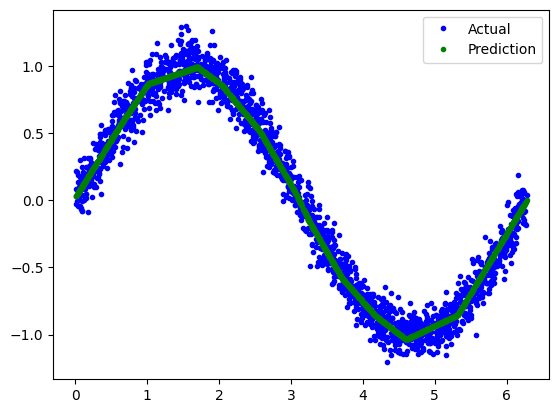

In [44]:
plt.plot(x_test, y_test, '.b', label = "Actual")
plt.plot(x_test, y_prediksi, '.g', label = "Prediction")
plt.legend()
plt.show()